In [1]:
import time
import itertools
import time, os, fnmatch, shutil
import pickle
import re
# Python 2 & 3 Compatibility
from __future__ import print_function, division

# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
from seaborn import plt
import matplotlib

#matplotlib.rcParams.update({'font.size': 22})

%matplotlib inline

from __future__ import print_function, division
import requests

In [2]:
pkl_filename_master = "IP_OP_Hosp_cost_dem_inc_df_3_levels.pkl"
with open(pkl_filename_master, 'rb') as picklefile: 
    df_model_data = pickle.load(picklefile)

In [3]:
df_model_data.columns

Index([u'Average_Covered_Charges', u'Average_Medicare_Payments',
       u'Average_Total_Payments', u'DRG_Definition',
       u'Hospital_Referral_Region_(HRR)_Description', u'Provider_City',
       u'Provider_ID', u'Provider_Name', u'Provider_State',
       u'Provider_Street_Address',
       ...
       u'Percent_Male', u'Percent_Occupied_Housing_Units_y',
       u'Percent_some_other_race', u'Percent_white', u'Rental_vacancy_rate',
       u'Homeowner_vacancy_rate', u'Average_family_size', u'Median_income_zip',
       u'Mean_income_zip', u'Zip_population'],
      dtype='object', length=126)

In [4]:
df_Model_1 = df_model_data.copy()

In [5]:
Column_list = [u'log_Average_Covered_Charges_ST_mean',\
       u'log_Average_Covered_Charges_ST_median',\
       u'log_Average_Covered_Charges_ST_std',\
       u'log_Average_Medicare_Payments_ST_mean',\
       u'log_Average_Medicare_Payments_ST_median',\
       u'log_Average_Medicare_Payments_ST_std',\
       u'log_Average_Total_Payments_ST_mean',\
       u'log_Average_Total_Payments_ST_median',\
       u'log_Average_Total_Payments_ST_std', u'log_Patient_payment_ST_mean',\
       u'log_Patient_payment_ST_median', u'log_Patient_payment_ST_std',\
       u'Average_Covered_Charges_mean_3_bins',\
       u'Average_Covered_Charges_mean_ST_3_bins',\
       u'Average_Covered_Charges_median_ST_3_bins',\
       u'Average_Medicare_Payments_mean_3_bins',\
       u'Average_Medicare_Payments_mean_ST_3_bins',\
       u'Average_Medicare_Payments_median_3_bins',\
       u'Average_Medicare_Payments_median_ST_3_bins',\
       u'Average_Total_Payments_mean_3_bins',\
       u'Average_Total_Payments_mean_ST_3_bins',\
       u'Average_Total_Payments_median_3_bins',\
       u'Average_Total_Payments_median_ST_3_bins',\
       u'Patient_payment_mean_3_bins', u'Patient_payment_mean_ST_3_bins',\
       u'Patient_payment_median_3_bins', u'Patient_payment_median_ST_3_bins',\
       u'log_Average_Covered_Charges_mean_3_bins',\
       u'log_Average_Covered_Charges_mean_ST_3_bins',\
       u'log_Average_Covered_Charges_median_ST_3_bins',\
       u'log_Average_Medicare_Payments_mean_3_bins',\
       u'log_Average_Medicare_Payments_mean_ST_3_bins',\
       u'log_Average_Medicare_Payments_median_3_bins',\
       u'log_Average_Medicare_Payments_median_ST_3_bins',\
       u'log_Average_Total_Payments_mean_3_bins',\
       u'log_Average_Total_Payments_mean_ST_3_bins',\
       u'log_Average_Total_Payments_median_3_bins',\
       u'log_Average_Total_Payments_median_ST_3_bins',\
       u'log_Patient_payment_mean_3_bins',\
       u'log_Patient_payment_mean_ST_3_bins',\
       u'log_Patient_payment_median_3_bins',\
       u'log_Patient_payment_median_ST_3_bins',\
              u'log_Average_Covered_Charges_median_3_bins',\
              u'Average_Covered_Charges_median_3_bins']


for column in Column_list:
    df_Model_1[column] = pd.to_numeric(df_Model_1[column])
    df_Model_1[column] = df_Model_1[column].astype(float)
    

In [34]:
#df_Model_1 = df_Model_1.drop(['Patient_payment','Patient_Payments_Stdev','Patient_Payments_Avg','Medicare_Payments_Std','Medicare_Payments_Avg','Total_Payments_Stdev','Total_Payments_Avg','Covered_Charges_Stdev','Covered_Charges_Avg','Provider_Name','Average_Covered_Charges','Provider_Street_Address','Provider_City','Hospital_Referral_Region_Description','Total_Discharges','Average_Total_Payments','Meets_criteria_for_meaningful_use_of_EHRs','Readmission_national_comparison','Patient_experience_national_comparison','Average_Medicare_Payments','Hospital_Name', 'County_Name'],1)

df_Model_1 = df_Model_1.drop([u'Average_Covered_Charges', u'Average_Medicare_Payments',\
       u'Average_Total_Payments', \
       u'Hospital_Referral_Region_(HRR)_Description', u'Provider_City',\
       u'Provider_ID', u'Provider_Name',\
       u'Provider_Street_Address',u'Total_Discharges',\
       u'Hospital_Name',u'Patient_payment',\
       u'log_Average_Covered_Charges', u'log_Average_Medicare_Payments',\
       u'log_Average_Total_Payments', u'log_Patient_payment',\
       u'Average_Covered_Charges_mean', u'Average_Covered_Charges_median',\
       u'Average_Covered_Charges_std', u'Average_Medicare_Payments_mean',\
       u'Average_Medicare_Payments_median', u'Average_Medicare_Payments_std',\
       u'Average_Total_Payments_mean', u'Average_Total_Payments_median',\
       u'Average_Total_Payments_std', u'Patient_payment_mean',\
       u'Patient_payment_median', u'Patient_payment_std',\
       u'log_Average_Covered_Charges_mean',\
       u'log_Average_Covered_Charges_median',\
       u'log_Average_Covered_Charges_std',\
       u'log_Average_Medicare_Payments_mean',\
       u'log_Average_Medicare_Payments_median',\
       u'log_Average_Medicare_Payments_std',\
       u'log_Average_Total_Payments_mean',\
       u'log_Average_Total_Payments_median', u'log_Average_Total_Payments_std',\
       u'log_Patient_payment_mean', u'log_Patient_payment_median',\
       u'log_Patient_payment_std', u'Average_Covered_Charges_ST_mean',\
       u'Average_Covered_Charges_ST_median', u'Average_Covered_Charges_ST_std',\
       u'Average_Medicare_Payments_ST_mean',\
       u'Average_Medicare_Payments_ST_median',\
       u'Average_Medicare_Payments_ST_std', u'Average_Total_Payments_ST_mean',\
       u'Average_Total_Payments_ST_median', u'Average_Total_Payments_ST_std',\
       u'Patient_payment_ST_mean', u'Patient_payment_ST_median',\
       u'Patient_payment_ST_std', u'log_Average_Covered_Charges_ST_mean',\
       u'log_Average_Covered_Charges_ST_median',\
       u'log_Average_Covered_Charges_ST_std',\
       u'log_Average_Medicare_Payments_ST_mean',\
       u'log_Average_Medicare_Payments_ST_median',\
       u'log_Average_Medicare_Payments_ST_std',\
       u'log_Average_Total_Payments_ST_mean',\
       u'log_Average_Total_Payments_ST_median',\
       u'log_Average_Total_Payments_ST_std', u'log_Patient_payment_ST_mean',\
       u'log_Patient_payment_ST_median', u'log_Patient_payment_ST_std',\
       u'Average_Covered_Charges_mean_3_bins',\
       u'Average_Covered_Charges_mean_ST_3_bins',\
       u'Average_Covered_Charges_median_ST_3_bins',\
       u'Average_Medicare_Payments_mean_3_bins',\
       u'Average_Medicare_Payments_mean_ST_3_bins',\
       u'Average_Medicare_Payments_median_3_bins',\
       u'Average_Medicare_Payments_median_ST_3_bins',\
       u'Average_Total_Payments_mean_3_bins',\
       u'Average_Total_Payments_mean_ST_3_bins',\
       u'Average_Total_Payments_median_3_bins',\
       u'Average_Total_Payments_median_ST_3_bins',\
       u'Patient_payment_mean_3_bins', u'Patient_payment_mean_ST_3_bins',\
       u'Patient_payment_median_3_bins', u'Patient_payment_median_ST_3_bins',\
       u'log_Average_Covered_Charges_mean_3_bins',\
       u'log_Average_Covered_Charges_mean_ST_3_bins',\
       u'log_Average_Covered_Charges_median_ST_3_bins',\
       u'log_Average_Medicare_Payments_mean_3_bins',\
       u'log_Average_Medicare_Payments_mean_ST_3_bins',\
       u'log_Average_Medicare_Payments_median_3_bins',\
       u'log_Average_Medicare_Payments_median_ST_3_bins',\
       u'log_Average_Total_Payments_mean_3_bins',\
       u'log_Average_Total_Payments_mean_ST_3_bins',\
       u'log_Average_Total_Payments_median_3_bins',\
       u'log_Average_Total_Payments_median_ST_3_bins',\
       u'log_Patient_payment_mean_3_bins',\
       u'log_Patient_payment_mean_ST_3_bins',\
       u'log_Patient_payment_median_3_bins',\
       u'log_Patient_payment_median_ST_3_bins',\
       u'Provider_State', u'Provider_Zip_Code',\
        u'State_spelled', u'County_State',\
        u'County', u'State',u'Percent_female',\
        u'Percent_some_other_race',u'Mean_income_zip',\
                             u'County_Name',],1)
 


ValueError: labels [u'Average_Covered_Charges' u'Average_Medicare_Payments'
 u'Average_Total_Payments' u'Hospital_Referral_Region_(HRR)_Description'
 u'Provider_City' u'Provider_ID' u'Provider_Name'
 u'Provider_Street_Address' u'Total_Discharges' u'Hospital_Name'
 u'Patient_payment' u'log_Average_Covered_Charges'
 u'log_Average_Medicare_Payments' u'log_Average_Total_Payments'
 u'log_Patient_payment' u'Average_Covered_Charges_mean'
 u'Average_Covered_Charges_median' u'Average_Covered_Charges_std'
 u'Average_Medicare_Payments_mean' u'Average_Medicare_Payments_median'
 u'Average_Medicare_Payments_std' u'Average_Total_Payments_mean'
 u'Average_Total_Payments_median' u'Average_Total_Payments_std'
 u'Patient_payment_mean' u'Patient_payment_median' u'Patient_payment_std'
 u'log_Average_Covered_Charges_mean' u'log_Average_Covered_Charges_median'
 u'log_Average_Covered_Charges_std' u'log_Average_Medicare_Payments_mean'
 u'log_Average_Medicare_Payments_median'
 u'log_Average_Medicare_Payments_std' u'log_Average_Total_Payments_mean'
 u'log_Average_Total_Payments_median' u'log_Average_Total_Payments_std'
 u'log_Patient_payment_mean' u'log_Patient_payment_median'
 u'log_Patient_payment_std' u'Average_Covered_Charges_ST_mean'
 u'Average_Covered_Charges_ST_median' u'Average_Covered_Charges_ST_std'
 u'Average_Medicare_Payments_ST_mean'
 u'Average_Medicare_Payments_ST_median' u'Average_Medicare_Payments_ST_std'
 u'Average_Total_Payments_ST_mean' u'Average_Total_Payments_ST_median'
 u'Average_Total_Payments_ST_std' u'Patient_payment_ST_mean'
 u'Patient_payment_ST_median' u'Patient_payment_ST_std'
 u'log_Average_Covered_Charges_ST_mean'
 u'log_Average_Covered_Charges_ST_median'
 u'log_Average_Covered_Charges_ST_std'
 u'log_Average_Medicare_Payments_ST_mean'
 u'log_Average_Medicare_Payments_ST_median'
 u'log_Average_Medicare_Payments_ST_std'
 u'log_Average_Total_Payments_ST_mean'
 u'log_Average_Total_Payments_ST_median'
 u'log_Average_Total_Payments_ST_std' u'log_Patient_payment_ST_mean'
 u'log_Patient_payment_ST_median' u'log_Patient_payment_ST_std'
 u'Average_Covered_Charges_mean_3_bins'
 u'Average_Covered_Charges_mean_ST_3_bins'
 u'Average_Covered_Charges_median_ST_3_bins'
 u'Average_Medicare_Payments_mean_3_bins'
 u'Average_Medicare_Payments_mean_ST_3_bins'
 u'Average_Medicare_Payments_median_3_bins'
 u'Average_Medicare_Payments_median_ST_3_bins'
 u'Average_Total_Payments_mean_3_bins'
 u'Average_Total_Payments_mean_ST_3_bins'
 u'Average_Total_Payments_median_3_bins'
 u'Average_Total_Payments_median_ST_3_bins' u'Patient_payment_mean_3_bins'
 u'Patient_payment_mean_ST_3_bins' u'Patient_payment_median_3_bins'
 u'Patient_payment_median_ST_3_bins'
 u'log_Average_Covered_Charges_mean_3_bins'
 u'log_Average_Covered_Charges_mean_ST_3_bins'
 u'log_Average_Covered_Charges_median_ST_3_bins'
 u'log_Average_Medicare_Payments_mean_3_bins'
 u'log_Average_Medicare_Payments_mean_ST_3_bins'
 u'log_Average_Medicare_Payments_median_3_bins'
 u'log_Average_Medicare_Payments_median_ST_3_bins'
 u'log_Average_Total_Payments_mean_3_bins'
 u'log_Average_Total_Payments_mean_ST_3_bins'
 u'log_Average_Total_Payments_median_3_bins'
 u'log_Average_Total_Payments_median_ST_3_bins'
 u'log_Patient_payment_mean_3_bins' u'log_Patient_payment_mean_ST_3_bins'
 u'log_Patient_payment_median_3_bins'
 u'log_Patient_payment_median_ST_3_bins' u'Provider_State'
 u'Provider_Zip_Code' u'State_spelled' u'County_State' u'County' u'State'
 u'Percent_female' u'Percent_some_other_race' u'Mean_income_zip'
 u'County_Name'] not contained in axis

In [7]:
df_Model_1.columns

Index([u'DRG_Definition', u'Service_type', u'Hospital_Type',
       u'Hospital_Ownership', u'Emergency_Services',
       u'Average_Covered_Charges_median_3_bins',
       u'log_Average_Covered_Charges_median_3_bins', u'DRG_Definition_count',
       u'Median_Age', u'Percent_Occupied_Housing_Units_x', u'Percent_over_65',
       u'Percent_Native_American', u'Percent_asian',
       u'Percent Black or African American', u'Percent_hispanic_or_latino',
       u'Percent_Male', u'Percent_Occupied_Housing_Units_y', u'Percent_white',
       u'Rental_vacancy_rate', u'Homeowner_vacancy_rate',
       u'Average_family_size', u'Median_income_zip', u'Zip_population'],
      dtype='object')

First model will be without ratings d/t data loss of specific hospital types if we leave them in 

In [8]:
df_Model_1a = df_Model_1[df_Model_1.Service_type == '0']

In [9]:
df_Model_1a[[u'Service_type', u'Hospital_Type',\
       u'Hospital_Ownership', u'Emergency_Services',\
       u'Average_Covered_Charges_median_3_bins']].apply(pd.Series.value_counts)
 

,Service_type,Hospital_Type,Hospital_Ownership,Emergency_Services,Average_Covered_Charges_median_3_bins
False,NaN,NaN,NaN,2782.0,53373.0
True,NaN,NaN,NaN,198548.0,82321.0
0,202656.0,NaN,NaN,NaN,NaN
Acute Care Hospitals,NaN,201330.0,NaN,NaN,NaN
Government - Federal,NaN,NaN,444.0,NaN,NaN
Government - Hospital District or Authority,NaN,NaN,13844.0,NaN,NaN
Government - Local,NaN,NaN,6730.0,NaN,NaN
Government - State,NaN,NaN,4430.0,NaN,NaN
Physician,NaN,NaN,578.0,NaN,NaN
Proprietary,NaN,NaN,31296.0,NaN,NaN


In [10]:
df_Model_1a['Hospital_Ownership'] = df_Model_1a['Hospital_Ownership'].replace('Tribal','zTribal')

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [11]:
df_Model_1a.dtypes

DRG_Definition                                object
Service_type                                  object
Hospital_Type                                 object
Hospital_Ownership                            object
Emergency_Services                            object
Average_Covered_Charges_median_3_bins        float64
log_Average_Covered_Charges_median_3_bins    float64
DRG_Definition_count                           int64
Median_Age                                   float64
Percent_Occupied_Housing_Units_x             float64
Percent_over_65                              float64
Percent_Native_American                      float64
Percent_asian                                float64
Percent Black or African American            float64
Percent_hispanic_or_latino                   float64
Percent_Male                                 float64
Percent_Occupied_Housing_Units_y             float64
Percent_white                                float64
Rental_vacancy_rate                          f

In [12]:
df_Model_1a['Average_Covered_Charges_median_3_bins'].groupby(df_Model_1a['Hospital_Ownership']).mean()

Hospital_Ownership
Government - Federal                           0.885135
Government - Hospital District or Authority    0.938024
Government - Local                             0.703418
Government - State                             1.151693
Physician                                      1.005190
Proprietary                                    1.512046
Voluntary non-profit - Church                  1.091837
Voluntary non-profit - Other                   0.984080
Voluntary non-profit - Private                 0.982432
zTribal                                        0.000000
Name: Average_Covered_Charges_median_3_bins, dtype: float64

In [13]:
df_Model_1a = df_Model_1a.drop(['Service_type',u'Hospital_Type', u'Emergency_Services',u'Percent_Occupied_Housing_Units_x'],1)

In [14]:
df_Model_1a.columns

Index([u'DRG_Definition', u'Hospital_Ownership',
       u'Average_Covered_Charges_median_3_bins',
       u'log_Average_Covered_Charges_median_3_bins', u'DRG_Definition_count',
       u'Median_Age', u'Percent_over_65', u'Percent_Native_American',
       u'Percent_asian', u'Percent Black or African American',
       u'Percent_hispanic_or_latino', u'Percent_Male',
       u'Percent_Occupied_Housing_Units_y', u'Percent_white',
       u'Rental_vacancy_rate', u'Homeowner_vacancy_rate',
       u'Average_family_size', u'Median_income_zip', u'Zip_population'],
      dtype='object')

KeyError: 'Level network must be same as name (None)'

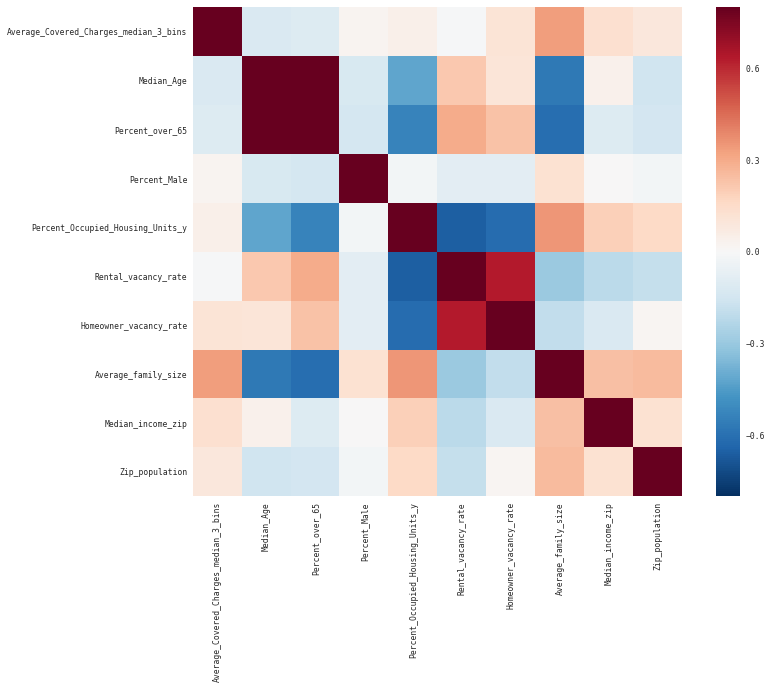

In [15]:
df_Model_1a_check = df_Model_1a.drop([u'log_Average_Covered_Charges_median_3_bins',\
       u'DRG_Definition_count', u'Percent_Native_American',\
       u'Percent_asian', u'Percent Black or African American',\
       u'Percent_hispanic_or_latino',u'Percent_white'],1)


import seaborn as sns
import matplotlib.pyplot as plt
sns.set(context="paper", font="monospace")

# Load the datset of correlations between cortical brain networks
df = df_Model_1a_check
corrmat = df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)

# Use matplotlib directly to emphasize known networks
networks = corrmat.columns.get_level_values("network")
for i, network in enumerate(networks):
    if i and network != networks[i - 1]:
        ax.axhline(len(networks) - i, c="w")
        ax.axvline(i, c="w")
f.tight_layout()

In [16]:
df_Model_1a = df_Model_1a[df_Model_1a.DRG_Definition_count >= 1500]

In [17]:
df_Model_1a['DRG_Definition'].value_counts()

871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC                      2837
194 - SIMPLE PNEUMONIA & PLEURISY W CC                                        2837
292 - HEART FAILURE & SHOCK W CC                                              2774
392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC                  2743
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC                               2731
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC      2702
603 - CELLULITIS W/O MCC                                                      2653
291 - HEART FAILURE & SHOCK W MCC                                             2646
872 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W/O MCC                    2588
190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC                             2585
641 - MISC DISORDERS OF NUTRITION,METABOLISM,FLUIDS/ELECTROLYTES W/O MCC      2559
193 - SIMPLE PNEUMONIA & PLEURISY W MCC                                       2530
191 

In [18]:
import numpy as np
np.random.seed(10)

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing

In [19]:
df_Model_1a.columns

Index([u'DRG_Definition', u'Hospital_Ownership',
       u'Average_Covered_Charges_median_3_bins',
       u'log_Average_Covered_Charges_median_3_bins', u'DRG_Definition_count',
       u'Median_Age', u'Percent_over_65', u'Percent_Native_American',
       u'Percent_asian', u'Percent Black or African American',
       u'Percent_hispanic_or_latino', u'Percent_Male',
       u'Percent_Occupied_Housing_Units_y', u'Percent_white',
       u'Rental_vacancy_rate', u'Homeowner_vacancy_rate',
       u'Average_family_size', u'Median_income_zip', u'Zip_population'],
      dtype='object')

In [20]:
X = df_Model_1a.drop([u'Average_Covered_Charges_median_3_bins',\
       u'log_Average_Covered_Charges_median_3_bins', u'DRG_Definition_count',u'Percent_Native_American',\
       u'Percent_asian', u'Percent Black or African American',\
       u'Percent_hispanic_or_latino',u'Percent_white'],1)

In [21]:
X.columns

Index([u'DRG_Definition', u'Hospital_Ownership', u'Median_Age',
       u'Percent_over_65', u'Percent_Male',
       u'Percent_Occupied_Housing_Units_y', u'Rental_vacancy_rate',
       u'Homeowner_vacancy_rate', u'Average_family_size', u'Median_income_zip',
       u'Zip_population'],
      dtype='object')

In [22]:
y = df_Model_1a[u'Average_Covered_Charges_median_3_bins']

In [51]:
X_fewer_var = X.drop([u'Percent_Occupied_Housing_Units_y',u'Average_family_size',u'Percent_over_65'],1)

In [53]:
X_fewer_var.shape

(91470, 8)

In [61]:
X_fewer_var.columns

Index([u'DRG_Definition', u'Hospital_Ownership', u'Median_Age',
       u'Percent_Male', u'Rental_vacancy_rate', u'Homeowner_vacancy_rate',
       u'Median_income_zip', u'Zip_population'],
      dtype='object')

In [62]:
X_fewer_var_names = X_fewer_var.rename(columns={'DRG_Definition': 'Diagnosis', 'Hospital_Ownership': 'Hospital Ownership',\
                                                'Median_Age':'Median Age','Percent_Male':'Percent Male',\
                                                'Rental_vacancy_rate':'Rental vacancy rate','Homeowner_vacancy_rate':'Homeowner vacancy rate','Median_income_zip':'Median Income',\
                                               'Zip_population':'Population'})




In [63]:
y.value_counts()

1.0    38161
2.0    30079
0.0    23230
Name: Average_Covered_Charges_median_3_bins, dtype: int64

In [24]:
#le = preprocessing.LabelEncoder()
#States = le.fit(X['Provider_State'])

In [64]:
X_coded = X_fewer_var_names.apply(preprocessing.LabelEncoder().fit_transform)

In [ ]:
# #from sklearn import svm, datasets
# #uses a 3-fold CV by default if you do not define otherwise
# from sklearn.model_selection import GridSearchCV

# #parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
# #svr = svm.SVC()
# #clf = GridSearchCV(svr, parameters)

# clf = RandomForestClassifier()

# param_grid = {"max_depth": [3, None],
#               "max_features": [3,5,10,13,16],
#               "min_samples_split": [5,10,15],
#               "min_samples_leaf": [5,10,15],
#               "bootstrap": [True],
#               "criterion": ["gini"]}

# grid_search = GridSearchCV(clf, param_grid=param_grid)
# #start = time()
# grid_search.fit(X_coded, y)

# report(grid_search.cv_results_)

# # clf.fit()
# # ...                             
# # GridSearchCV(cv=None, error_score=...,
# #        estimator=SVC(C=1.0, cache_size=..., class_weight=..., coef0=...,
# #                      decision_function_shape=None, degree=..., gamma=...,
# #                      kernel='rbf', max_iter=-1, probability=False,
# #                      random_state=None, shrinking=True, tol=...,
# #                      verbose=False),
# #        fit_params={}, iid=..., n_jobs=1,
# #        param_grid=..., pre_dispatch=..., refit=..., return_train_score=...,
# #        scoring=..., verbose=...)
# # sorted(clf.cv_results_.keys())
# # ...                             
# # ['mean_fit_time', 'mean_score_time', 'mean_test_score',...
# #  'mean_train_score', 'param_C', 'param_kernel', 'params',...
# #  'rank_test_score', 'split0_test_score',...
# #  'split0_train_score', 'split1_test_score', 'split1_train_score',...
# #  'split2_test_score', 'split2_train_score',...
# #  'std_fit_time', 'std_score_time', 'std_test_score', 'std_train_score'...]

In [65]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 8),
              "min_samples_split": sp_randint(2, 20),
              "min_samples_leaf": sp_randint(2,20),
              "bootstrap": [True],
              "criterion": ["gini"]}

# run randomized search
n_iter_search = 30
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

#start = time()
random_search.fit(X_coded, y)
#print("RandomizedSearchCV took %.2f seconds for %d candidates"
#      " parameter settings." % ((time() - start), n_iter_search))
#report(random_search.cv_results_)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=30, n_jobs=1,
          param_distributions={'bootstrap': [True], 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x10eb336d0>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x12d53f050>, 'criterion': ['gini'], 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x10eb33c90>, 'max_depth': [3, None]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=0)

In [66]:
print(random_search.best_estimator_,random_search.best_score_, random_search.best_params_ , random_search.best_index_,random_search.n_splits_ )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=12,
            min_samples_split=12, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False) 0.816158303269 {'bootstrap': True, 'min_samples_leaf': 12, 'min_samples_split': 12, 'criterion': 'gini', 'max_features': 4, 'max_depth': None} 23 3


In [67]:
random_search.best_score_

0.81615830326883132

## Check gridsearch parameters in randomforest classifier


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_coded, y, test_size=0.3)

In [74]:
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.cross_validation import cross_val_score

y_obs = y_test
accuracy_dict = dict()
precision_dict = dict()
recall_dict = dict()
f1_dict = dict()
 

for algorithm in [RandomForestClassifier(bootstrap =  True,criterion = 'gini',\
                                         max_depth= None, max_features = 4,\
                                         min_samples_leaf= 12, min_samples_split = 12)]:
     
    algorithm.fit(X_train, y_train)
    y_pred = algorithm.predict(X_test)
    alg_label = str(algorithm)
    alg_label = alg_label[:alg_label.index('(')]
    importances = algorithm.feature_importances_
    # create dictionary of stats
    accuracy_dict[alg_label] = accuracy_score(y_obs, y_pred)
    precision_dict[alg_label] = precision_score(y_obs, y_pred, average='micro')
    recall_dict[alg_label] = recall_score(y_obs, y_pred, average='micro')
    f1_dict[alg_label] = f1_score(y_obs, y_pred, average='micro')
    feature_importance = importances
    estimators = [estimator.tree_.max_depth for estimator in algorithm.estimators_]

    print( '\n')
    print(alg_label)
    print('-'*20)
    #print
    print( "classification report")
    print( classification_report(y_obs, y_pred))
    #print
    print( '   accuracy score             %.4f ' % (accuracy_score(y_obs, y_pred)))
    print( '   precision score            %.4f ' % precision_score(y_obs, y_pred, average='micro'))
    print( '   recall score               %.4f ' % recall_score(y_obs, y_pred, average='micro'))
    print( '   f1 score                   %.4f ' % f1_score(y_obs, y_pred, average='micro'))
    print('feature_importance = ', feature_importance)
    print('max_tree_depth = ', estimators)
    

    
def print_items(dictionary):
    for k,v in dictionary.iteritems():
        spaces = 30-len(k)
        newclf = k + ' '*spaces
        print( '  %s %.4f' % (newclf, v))
        

print( '\nPresent by Statistics to Compare Models')

print( '\nAccuracy')
print_items(accuracy_dict)

print( '\nPrecision')
print_items(precision_dict)

print( '\nRecall')
print_items(recall_dict)

print( '\nF1')



RandomForestClassifier
--------------------
classification report
             precision    recall  f1-score   support

        0.0       0.83      0.79      0.81      7002
        1.0       0.78      0.81      0.79     11378
        2.0       0.88      0.86      0.87      9061

avg / total       0.82      0.82      0.82     27441

   accuracy score             0.8235 
   precision score            0.8235 
   recall score               0.8235 
   f1 score                   0.8235 
feature_importance =  [ 0.02423227  0.09912348  0.16178329  0.1227928   0.14188486  0.12780887
  0.17476408  0.14761035]
max_tree_depth =  [26, 24, 26, 26, 27, 25, 25, 25, 29, 28]

Present by Statistics to Compare Models

Accuracy
  RandomForestClassifier         0.8235

Precision
  RandomForestClassifier         0.8235

Recall
  RandomForestClassifier         0.8235

F1


8
8
('Diagnosis', 'Hospital Ownership', 'Percent Male', 'Homeowner vacancy rate', 'Rental vacancy rate', 'Population', 'Median Age', 'Median Income')


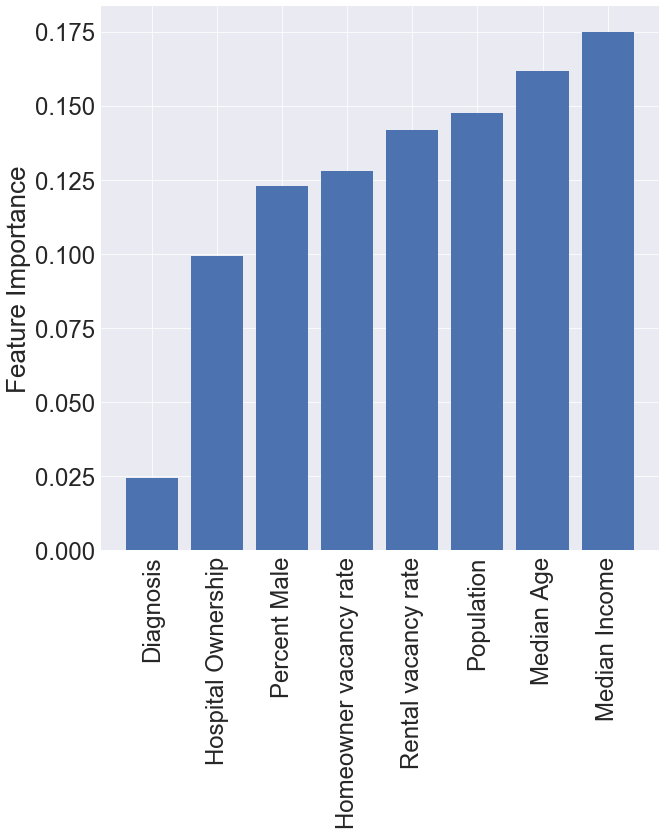

In [80]:
sns.set(context="paper", font='sans-serif')

feature_importance = importances
feature_importance_list = list()
features_list = list()
for feature in feature_importance:
    feature_importance_list.append(feature)
for column in X_coded.columns:
    features_list.append(column)

print(len(feature_importance_list))
print(len(features_list))

zipped = zip(features_list,feature_importance_list)
zipped.sort(key = lambda t: t[1])
zipped

features = zip(*zipped)[0]
importance = zip(*zipped)[1]
x_pos = np.arange(len(zipped)) 

print(features)

plt.figure(figsize=(10,10))
plt.bar(x_pos, importance ,align='center')
plt.yticks(fontsize = 24) 
plt.xticks(x_pos, features, rotation = 90, fontsize = 24) 
plt.ylabel('Feature Importance', fontsize = 26)

plt.show()

In [77]:
y_true = y_test
y_pred = algorithm.predict(X_test)

In [78]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred, labels=[float(0), float(1), float(2)])

array([[5528, 1433,   41],
       [1092, 9254, 1032],
       [  25, 1221, 7815]])

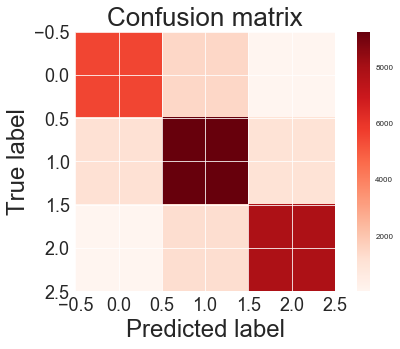

In [79]:
def plot_confusion_matrix(cm,title='Confusion matrix', cmap=plt.cm.Reds, fontsize = 26):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title,fontsize = 26)
    plt.colorbar()
    #plt.colorbar().set_label(label='a label',size=15,weight='bold')
    #colorbar.ax.tick_params(labelsize=10)
    plt.tight_layout()
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 18)
    plt.ylabel('True label',fontsize = 24)
    plt.xlabel('Predicted label',fontsize = 24)
    
cm=confusion_matrix(y_true, y_pred, labels=[float(0), float(1), float(2)])
#cb = plt.colorbar()
#cb.set_label(label='a label',weight='bold')
plt.figure()
plot_confusion_matrix(cm)

In [55]:
fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

NameError: name 'y_score' is not defined

In [56]:
classifier = LogisticRegression(C=0.1)
clf = classifier.fit(X_train, y_train)
train_acc=clf.score(X_train, y_train)
test_acc=clf.score(X_test, y_test)
#train_acc=accuracy_score(X_train, y_train)
#test_acc=accuracy_score(X_test, y_test)

print("Training Data Accuracy: %0.2f" %(train_acc))
print("Test Data Accuracy:     %0.2f" %(test_acc))

Training Data Accuracy: 0.48
Test Data Accuracy:     0.47


In [57]:
def plot_confusion_matrix(cm,title='Confusion matrix', cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[7699  147 1969]
 [5410  139 3124]
 [3696   71 5186]]


Test Data Accuracy:     0.47
Precision:              0.59
Recall:                 0.98
F1:                     0.73


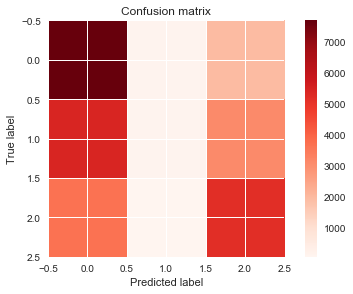

In [58]:
from patsy import dmatrices

from sklearn import linear_model as lm
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
from sklearn import metrics
from sklearn.metrics import confusion_matrix

y_true = y_test
y_pred = clf.predict(X_test)


conf = confusion_matrix(y_true, y_pred)
precision = (conf[0, 0] / (conf[0, 0] + conf[1, 0]))
recall = (conf[0, 0] / (conf[0, 0] + conf[0, 1]))
F1 = 2*((precision*recall)/(precision+recall))
            
print(conf)
print ('\n')
print ("Test Data Accuracy:     %0.2f" %(test_acc))

print ("Precision:              %0.2f" %(conf[0, 0] / (conf[0, 0] + conf[1, 0])))
print ("Recall:                 %0.2f"% (conf[0, 0] / (conf[0, 0] + conf[0, 1])))
print ("F1:                     %0.2f" % F1)
cm=confusion_matrix(y_true, y_pred, labels=None)
    
plt.figure()
plot_confusion_matrix(cm)

In [59]:
classifier.fit(X_train,np.ravel(y_train))
y_score=classifier.predict_proba(X_test)[:,1]

In [60]:
y_score

array([ 0.28682492,  0.29594324,  0.29465302, ...,  0.29426792,
        0.29995354,  0.31876143])

In [61]:
from sklearn import metrics

fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

ValueError: Data is not binary and pos_label is not specified

In [82]:
Y = df_Model_1a['log_Average_Covered_Charges_mean_3_bins']

In [83]:
X_coded.head()

,DRG_Definition,Hospital_Ownership,Median_Age,Percent_Occupied_Housing_Units_x,Percent_over_65,Percent_Native_American,Percent_asian,Percent Black or African American,Percent_hispanic_or_latino,Percent_Male,Percent_white,Rental_vacancy_rate,Homeowner_vacancy_rate,Average_family_size,Median_income_zip,Zip_population
6158,0,978,113,213,80,3,7,220,25,22,199,61,18,33,775,2049
6159,0,978,110,197,84,7,4,15,117,35,363,49,19,42,459,701
6160,0,978,132,192,103,3,6,98,18,21,351,56,15,26,4263,2930
6161,0,985,99,186,66,2,13,300,35,16,71,96,28,42,1875,987
6162,0,985,97,224,41,2,18,104,55,32,319,89,21,45,2268,1457


In [84]:
#print("repres,  len, shape: ", len(representatives), representatives.shape)
print("X--> len, shape(X): ", len(X), X_coded.shape)
print("Y--> len, shape(Y): ", len(Y), Y.shape)

print("\n")
#print X.head()
print(Y.head())

testpct = 0.30
#testpct = 0.25

X_train, X_test, Y_train, Y_test = train_test_split(X_coded,Y, test_size=testpct, random_state=4444)

X--> len, shape(X):  91470 (91470, 16)
Y--> len, shape(Y):  91470 (91470,)


6158    1
6159    0
6160    1
6161    2
6162    1
Name: log_Average_Covered_Charges_mean_3_bins, dtype: object


In [70]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.cross_validation import cross_val_score
    
y_obs = Y_test

accuracy_dict = dict()
precision_dict = dict()
recall_dict = dict()
f1_dict = dict()
 
for algorithm in [KNeighborsClassifier(n_neighbors=18),
            LogisticRegression(C=0.1), 
            DecisionTreeClassifier(), 
            RandomForestClassifier()]:
     
    algorithm.fit(X_train, Y_train)
    y_pred = algorithm.predict(X_test)
    alg_label = str(algorithm)
    alg_label = alg_label[:alg_label.index('(')]
    
    # create dictionary of stats
    accuracy_dict[alg_label] = accuracy_score(y_obs, y_pred)
    precision_dict[alg_label] = precision_score(y_obs, y_pred, average='macro')
    recall_dict[alg_label] = recall_score(y_obs, y_pred, average='macro')
    f1_dict[alg_label] = f1_score(y_obs, y_pred, average='macro')

    print( '\n')
    print(alg_label)
    print('-'*20)
    #print
    print( "classification report")
    print( classification_report(y_obs, y_pred))
    #print
    print( '   accuracy score             %.4f ' % (accuracy_score(y_obs, y_pred)))
    print( '   precision score            %.4f ' % precision_score(y_obs, y_pred, average='macro'))
    print( '   recall score               %.4f ' % recall_score(y_obs, y_pred, average='macro'))
    print( '   f1 score                   %.4f ' % f1_score(y_obs, y_pred, average='macro'))
    
    

    
def print_items(dictionary):
    for k,v in dictionary.iteritems():
        spaces = 30-len(k)
        newclf = k + ' '*spaces
        print( '  %s %.4f' % (newclf, v))
        

print( '\nPresent by Statistics to Compare Models')

print( '\nAccuracy')
print_items(accuracy_dict)

print( '\nPrecision')
print_items(precision_dict)

print( '\nRecall')
print_items(recall_dict)

print( '\nF1')
print_items(f1_dict)



KNeighborsClassifier
--------------------
classification report
             precision    recall  f1-score   support

          0       0.76      0.81      0.79      9780
          1       0.65      0.64      0.64      8635
          2       0.85      0.80      0.82      9026

avg / total       0.75      0.75      0.75     27441

   accuracy score             0.7532 
   precision score            0.7526 
   recall score               0.7498 
   f1 score                   0.7506 


LogisticRegression
--------------------
classification report
             precision    recall  f1-score   support

          0       0.46      0.80      0.58      9780
          1       0.39      0.02      0.03      8635
          2       0.52      0.58      0.55      9026

avg / total       0.46      0.48      0.40     27441

   accuracy score             0.4807 
   precision score            0.4580 
   recall score               0.4651 
   f1 score                   0.3879 


DecisionTreeClassifier
-----

## Try GridSearchCV:

In [103]:
y = df_Model_1a['log_Average_Covered_Charges_mean_3_bins']

In [104]:
X_coded = X.apply(preprocessing.LabelEncoder().fit_transform)

In [108]:
#from sklearn import svm, datasets
#uses a 3-fold CV by default if you do not define otherwise
from sklearn.model_selection import GridSearchCV

#parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
#svr = svm.SVC()
#clf = GridSearchCV(svr, parameters)

clf = RandomForestClassifier()

param_grid = {"max_depth": [3, None],
              "max_features": [3,5,10,13,16],
              "min_samples_split": [3, 5, 10],
              "min_samples_leaf": [ 3, 5, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

grid_search = GridSearchCV(clf, param_grid=param_grid)
#start = time()
grid_search.fit(X_coded, y)

report(grid_search.cv_results_)

# clf.fit()
# ...                             
# GridSearchCV(cv=None, error_score=...,
#        estimator=SVC(C=1.0, cache_size=..., class_weight=..., coef0=...,
#                      decision_function_shape=None, degree=..., gamma=...,
#                      kernel='rbf', max_iter=-1, probability=False,
#                      random_state=None, shrinking=True, tol=...,
#                      verbose=False),
#        fit_params={}, iid=..., n_jobs=1,
#        param_grid=..., pre_dispatch=..., refit=..., return_train_score=...,
#        scoring=..., verbose=...)
# sorted(clf.cv_results_.keys())
# ...                             
# ['mean_fit_time', 'mean_score_time', 'mean_test_score',...
#  'mean_train_score', 'param_C', 'param_kernel', 'params',...
#  'rank_test_score', 'split0_test_score',...
#  'split0_train_score', 'split1_test_score', 'split1_train_score',...
#  'split2_test_score', 'split2_train_score',...
#  'std_fit_time', 'std_score_time', 'std_test_score', 'std_train_score'...]

NameError: name 'report' is not defined

In [109]:
grid_search.cv_results_

{'mean_fit_time': array([  0.61455544,   0.49780329,   0.48549819,   0.45986724,
          0.45395939,   1.70716135,   0.51489067,   0.51450666,
          0.61680603,   0.6906027 ,   0.67915567,   0.61333275,
          0.72450407,   0.68143201,   0.57891226,   0.60956812,
          0.61246864,   0.65830294,   0.93721302,   0.86222537,
          1.05629333,   1.18146237,   0.87259467,   1.22991467,
          1.37275068,   1.13567734,   1.38668307,   1.78669691,
          2.26233498,   1.33464495,   1.13190309,   1.11038995,
          0.99854636,   1.03981026,   1.14127763,   0.99660691,
          1.30103064,   1.22271427,   1.16722735,   1.20500167,
          1.22337802,   1.23346329,   1.26823831,   1.2293303 ,
          1.26368332,   1.05452863,   1.03893129,   1.0563097 ,
          1.021161  ,   1.1491123 ,   1.0849967 ,   1.00108131,
          1.03269839,   1.11201938,   1.55850935,   1.89218656,
          1.96272127,   2.19331662,   1.91786075,   1.66217597,
          1.56444534,  

In [110]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=13, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [111]:
grid_search.best_score_

0.80302831529463214

In [112]:
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 13,
 'min_samples_leaf': 10,
 'min_samples_split': 10}

In [114]:
for algorithm in [RandomForestClassifier(bootstrap =  True,criterion = 'gini',\
                                         max_depth= None, max_features = 13,\
                                         min_samples_leaf= 10, min_samples_split = 10)]:
     
    algorithm.fit(X_train, Y_train)
    y_pred = algorithm.predict(X_test)
    alg_label = str(algorithm)
    alg_label = alg_label[:alg_label.index('(')]
    importances = algorithm.feature_importances_
    # create dictionary of stats
    accuracy_dict[alg_label] = accuracy_score(y_obs, y_pred)
    precision_dict[alg_label] = precision_score(y_obs, y_pred, average='micro')
    recall_dict[alg_label] = recall_score(y_obs, y_pred, average='micro')
    f1_dict[alg_label] = f1_score(y_obs, y_pred, average='micro')
    feature_importance = importances
    estimators = [estimator.tree_.max_depth for estimator in algorithm.estimators_]

    print( '\n')
    print(alg_label)
    print('-'*20)
    #print
    print( "classification report")
    print( classification_report(y_obs, y_pred))
    #print
    print( '   accuracy score             %.4f ' % (accuracy_score(y_obs, y_pred)))
    print( '   precision score            %.4f ' % precision_score(y_obs, y_pred, average='micro'))
    print( '   recall score               %.4f ' % recall_score(y_obs, y_pred, average='micro'))
    print( '   f1 score                   %.4f ' % f1_score(y_obs, y_pred, average='micro'))
    print('feature_importance = ', feature_importance)
    print('max_tree_depth = ', estimators)
    

    
def print_items(dictionary):
    for k,v in dictionary.iteritems():
        spaces = 30-len(k)
        newclf = k + ' '*spaces
        print( '  %s %.4f' % (newclf, v))
        

print( '\nPresent by Statistics to Compare Models')

print( '\nAccuracy')
print_items(accuracy_dict)

print( '\nPrecision')
print_items(precision_dict)

print( '\nRecall')
print_items(recall_dict)

print( '\nF1')
print_items(f1_dict)



RandomForestClassifier
--------------------
classification report
             precision    recall  f1-score   support

          0       0.85      0.84      0.85      9780
          1       0.71      0.72      0.71      8635
          2       0.87      0.87      0.87      9026

avg / total       0.81      0.81      0.81     27441

   accuracy score             0.8127 
   precision score            0.8127 
   recall score               0.8127 
   f1 score                   0.8127 
feature_importance =  [ 0.04546597  0.08433372  0.04264243  0.03977599  0.0334963   0.02996351
  0.06058165  0.0343369   0.17579898  0.03296311  0.08140001  0.04576934
  0.03396756  0.04314959  0.10647143  0.1098835 ]
max_tree_depth =  [28, 25, 26, 27, 29, 26, 25, 29, 25, 26]

Present by Statistics to Compare Models

Accuracy
  RandomForestClassifier         0.8127

Precision
  RandomForestClassifier         0.8127

Recall
  RandomForestClassifier         0.8127

F1
  RandomForestClassifier         0.8127


In [115]:
feature_importance = importances
feature_importance_list = list()
features_list = list()
for feature in feature_importance:
    feature_importance_list.append(feature)
for column in X_coded.columns:
    features_list.append(column)

print(len(feature_importance_list))
print(len(features_list))

zipped = zip(features_list,feature_importance_list)
zipped.sort(key = lambda t: t[1])
zipped

#print(feature_importance)

16
16


[('Percent_Native_American', 0.029963510053299124),
 ('Percent_Male', 0.032963111179264981),
 ('Percent_over_65', 0.033496300721510434),
 ('Homeowner_vacancy_rate', 0.033967564328302849),
 ('Percent Black or African American', 0.034336903183365658),
 ('Percent_Occupied_Housing_Units_x', 0.039775987048936236),
 ('Median_Age', 0.042642430746133844),
 ('Average_family_size', 0.043149590800956372),
 ('DRG_Definition', 0.045465970046231464),
 ('Rental_vacancy_rate', 0.045769342644743319),
 ('Percent_asian', 0.060581646405008363),
 ('Percent_white', 0.08140000621446028),
 ('Hospital_Ownership', 0.084333718462242219),
 ('Median_income_zip', 0.10647143388072267),
 ('Zip_population', 0.10988350156311384),
 ('Percent_hispanic_or_latino', 0.17579898272170838)]

In [131]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.cross_validation import cross_val_score
    
y_obs = Y_test

accuracy_dict = dict()
precision_dict = dict()
recall_dict = dict()
f1_dict = dict()
 
for algorithm in [KNeighborsClassifier(n_neighbors=7),
            LogisticRegression(C=0.1), 
            SVC(),  
            GaussianNB(), 
            DecisionTreeClassifier(), 
            RandomForestClassifier()]:
     
    algorithm.fit(X_train, Y_train)
    y_pred = algorithm.predict(X_test)
    alg_label = str(algorithm)
    alg_label = alg_label[:alg_label.index('(')]
    
    # create dictionary of stats
    accuracy_dict[alg_label] = accuracy_score(y_obs, y_pred)
    precision_dict[alg_label] = precision_score(y_obs, y_pred)
    recall_dict[alg_label] = recall_score(y_obs, y_pred)
    f1_dict[alg_label] = f1_score(y_obs, y_pred)

    print( '\n')
    print(alg_label)
    print('-'*20)
    #print
    print( "classification report")
    print( classification_report(y_obs, y_pred))
    #print
    print( '   accuracy score             %.4f ' % (accuracy_score(y_obs, y_pred)))
    print( '   precision score            %.4f ' % precision_score(y_obs, y_pred))
    print( '   recall score               %.4f ' % recall_score(y_obs, y_pred))
    print( '   f1 score                   %.4f ' % f1_score(y_obs, y_pred))
    
    

    
def print_items(dictionary):
    for k,v in dictionary.iteritems():
        spaces = 30-len(k)
        newclf = k + ' '*spaces
        print( '  %s %.4f' % (newclf, v))
        

print( '\nPresent by Statistics to Compare Models')

print( '\nAccuracy')
print_items(accuracy_dict)

print( '\nPrecision')
print_items(precision_dict)

print( '\nRecall')
print_items(recall_dict)

print( '\nF1')
print_items(f1_dict)



KNeighborsClassifier
--------------------
classification report
             precision    recall  f1-score   support

          0       0.75      0.81      0.78     14451
          1       0.77      0.70      0.73     12990

avg / total       0.76      0.76      0.76     27441

   accuracy score             0.7580 
   precision score            0.7688 
   recall score               0.6989 
   f1 score                   0.7322 


LogisticRegression
--------------------
classification report
             precision    recall  f1-score   support

          0       0.57      0.70      0.63     14451
          1       0.56      0.42      0.48     12990

avg / total       0.57      0.57      0.56     27441

   accuracy score             0.5682 
   precision score            0.5578 
   recall score               0.4236 
   f1 score                   0.4815 


SVC
--------------------
classification report
             precision    recall  f1-score   support

          0       0.68      0.83 

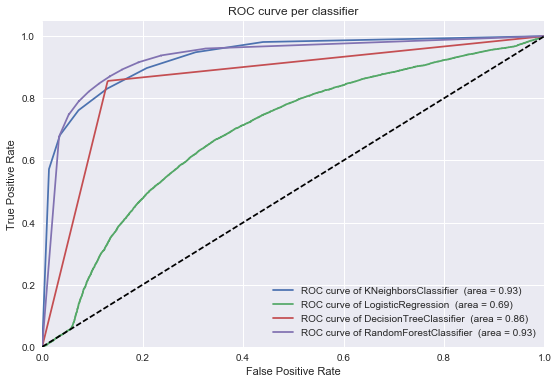

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import roc_curve, auc

fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(9)
plt.subplot(1,1,1)

for i, alg in enumerate([KNeighborsClassifier(n_neighbors=7),
            LogisticRegression(C=1), 
            DecisionTreeClassifier(), 
            RandomForestClassifier()]):
    alg.fit(X_train, Y_train)
    y_pred = alg.predict(X_test)

    try:
        y_score = alg.fit(X_train, Y_train).decision_function(X_test)
    except:
        y_score = (alg.fit(X_train, Y_train).predict_proba(X_test))[:,1]

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr[i], tpr[i], _ = roc_curve(y_obs, y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve
    alg_label = str(alg)
    alg_label = alg_label[:alg_label.index('(')]
    plt.plot(fpr[i], tpr[i], label='ROC curve of ' + alg_label+ '  (area = {1:0.2f})'.format(alg_label, roc_auc[i]))


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve per classifier')
plt.legend(loc="lower right")

In [101]:




from sklearn.ensemble import RandomForestClassifier


from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.cross_validation import cross_val_score
    
y_obs = Y_test

accuracy_dict = dict()
precision_dict = dict()
recall_dict = dict()
f1_dict = dict()
 
for algorithm in [RandomForestClassifier()]:
     
    algorithm.fit(X_train, Y_train)
    y_pred = algorithm.predict(X_test)
    alg_label = str(algorithm)
    alg_label = alg_label[:alg_label.index('(')]
    importances = algorithm.feature_importances_
    # create dictionary of stats
    accuracy_dict[alg_label] = accuracy_score(y_obs, y_pred)
    precision_dict[alg_label] = precision_score(y_obs, y_pred, average='micro')
    recall_dict[alg_label] = recall_score(y_obs, y_pred, average='micro')
    f1_dict[alg_label] = f1_score(y_obs, y_pred, average='micro')
    feature_importance = importances
    estimators = [estimator.tree_.max_depth for estimator in algorithm.estimators_]

    print( '\n')
    print(alg_label)
    print('-'*20)
    #print
    print( "classification report")
    print( classification_report(y_obs, y_pred))
    #print
    print( '   accuracy score             %.4f ' % (accuracy_score(y_obs, y_pred)))
    print( '   precision score            %.4f ' % precision_score(y_obs, y_pred, average='micro'))
    print( '   recall score               %.4f ' % recall_score(y_obs, y_pred, average='micro'))
    print( '   f1 score                   %.4f ' % f1_score(y_obs, y_pred, average='micro'))
    print('feature_importance = ', feature_importance)
    print('max_tree_depth = ', estimators)
    

    
def print_items(dictionary):
    for k,v in dictionary.iteritems():
        spaces = 30-len(k)
        newclf = k + ' '*spaces
        print( '  %s %.4f' % (newclf, v))
        

print( '\nPresent by Statistics to Compare Models')

print( '\nAccuracy')
print_items(accuracy_dict)

print( '\nPrecision')
print_items(precision_dict)

print( '\nRecall')
print_items(recall_dict)

print( '\nF1')
print_items(f1_dict)



RandomForestClassifier
--------------------
classification report
             precision    recall  f1-score   support

          0       0.80      0.83      0.81      9780
          1       0.65      0.63      0.64      8635
          2       0.85      0.84      0.84      9026

avg / total       0.77      0.77      0.77     27441

   accuracy score             0.7694 
   precision score            0.7694 
   recall score               0.7694 
   f1 score                   0.7694 
feature_importance =  [ 0.29122416  0.0546365   0.03659541  0.0357418   0.04289029  0.02369212
  0.0439921   0.03607693  0.09270361  0.03024814  0.04765336  0.0371703
  0.02603291  0.03555152  0.08681512  0.07897573]
max_tree_depth =  [35, 33, 32, 35, 39, 36, 33, 34, 39, 35]

Present by Statistics to Compare Models

Accuracy
  RandomForestClassifier         0.7694

Precision
  RandomForestClassifier         0.7694

Recall
  RandomForestClassifier         0.7694

F1
  RandomForestClassifier         0.7694


In [102]:
feature_importance = importances
feature_importance_list = list()
features_list = list()
for feature in feature_importance:
    feature_importance_list.append(feature)
for column in X_coded.columns:
    features_list.append(column)

print(len(feature_importance_list))
print(len(features_list))

zipped = zip(features_list,feature_importance_list)
zipped.sort(key = lambda t: t[1])
zipped

#print(feature_importance)

16
16


[('Percent_Native_American', 0.023692123180273628),
 ('Homeowner_vacancy_rate', 0.026032907664215694),
 ('Percent_Male', 0.030248137076246667),
 ('Average_family_size', 0.035551517874974348),
 ('Percent_Occupied_Housing_Units_x', 0.03574179800041509),
 ('Percent Black or African American', 0.036076933262104718),
 ('Median_Age', 0.03659540802276505),
 ('Rental_vacancy_rate', 0.037170303703914456),
 ('Percent_over_65', 0.042890292479209502),
 ('Percent_asian', 0.043992096942052757),
 ('Percent_white', 0.047653361878014666),
 ('Hospital_Ownership', 0.054636497466356473),
 ('Zip_population', 0.078975726090200066),
 ('Median_income_zip', 0.086815124501482224),
 ('Percent_hispanic_or_latino', 0.092703613205156021),
 ('DRG_Definition', 0.29122415865261864)]

In [75]:
# Y = df_Model_1a['log_Average_Covered_Charges_mean_3_bins']

# #from sklearn.preprocessing import label_binarize

# #Y_bin = label_binarize(Y, classes=[0,1,2])


In [78]:
# Y_bin

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ..., 
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [79]:
# #print("repres,  len, shape: ", len(representatives), representatives.shape)
# print("X--> len, shape(X): ", len(X), X_coded.shape)
# print("Y--> len, shape(Y): ", len(Y), Y.shape)

# print("\n")
# #print X.head()
# print(Y.head())

# testpct = 0.30
# #testpct = 0.25

# X_train, X_test, Y_train, Y_test = train_test_split(X_coded,Y_bin, test_size=testpct, random_state=4444)

X--> len, shape(X):  91470 (91470, 16)
Y--> len, shape(Y):  91470 (91470,)


6158    1
6159    0
6160    1
6161    2
6162    1
Name: log_Average_Covered_Charges_mean_3_bins, dtype: object


In [80]:

# accuracy_dict = dict()
# precision_dict = dict()
# recall_dict = dict()
# f1_dict = dict()
 
# for algorithm in [RandomForestClassifier()]:
     
#     algorithm.fit(X_train, Y_train)
#     y_pred = algorithm.predict(X_test)
#     alg_label = str(algorithm)
#     alg_label = alg_label[:alg_label.index('(')]
#     importances = algorithm.feature_importances_
#     # create dictionary of stats
#     accuracy_dict[alg_label] = accuracy_score(y_obs, y_pred)
#     precision_dict[alg_label] = precision_score(y_obs, y_pred, average='macro')
#     recall_dict[alg_label] = recall_score(y_obs, y_pred, average='macro')
#     f1_dict[alg_label] = f1_score(y_obs, y_pred, average='macro')
#     feature_importance = importances
#     estimators = [estimator.tree_.max_depth for estimator in algorithm.estimators_]

#     print( '\n')
#     print(alg_label)
#     print('-'*20)
#     #print
#     print( "classification report")
#     print( classification_report(y_obs, y_pred))
#     #print
#     print( '   accuracy score             %.4f ' % (accuracy_score(y_obs, y_pred)))
#     print( '   precision score            %.4f ' % precision_score(y_obs, y_pred, average='macro'))
#     print( '   recall score               %.4f ' % recall_score(y_obs, y_pred, average='macro'))
#     print( '   f1 score                   %.4f ' % f1_score(y_obs, y_pred, average='macro'))
#     print('feature_importance = ', feature_importance)
#     print('max_tree_depth = ', estimators)
    

    
# def print_items(dictionary):
#     for k,v in dictionary.iteritems():
#         spaces = 30-len(k)
#         newclf = k + ' '*spaces
#         print( '  %s %.4f' % (newclf, v))
        

# print( '\nPresent by Statistics to Compare Models')

# print( '\nAccuracy')
# print_items(accuracy_dict)

# print( '\nPrecision')
# print_items(precision_dict)

# print( '\nRecall')
# print_items(recall_dict)

# print( '\nF1')
# print_items(f1_dict)

ValueError: Can't handle mix of multiclass and multilabel-indicator

In [88]:
from sklearn import linear_model as lm
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
from sklearn import metrics
from sklearn.metrics import confusion_matrix


In [89]:
y_true = y_test
y_pred = clf.predict(X_test)

In [98]:
y_true.value_counts()

0    9815
2    8953
1    8673
Name: log_Average_Covered_Charges_mean_3_bins, dtype: int64

In [100]:
y_pred

array(['2', '0', '2', ..., '0', '0', '0'], dtype=object)

In [94]:
confusion_matrix(y_true, y_pred, labels=["0", "1", "2"])

array([[6069,  114, 3632],
       [5335,  108, 3230],
       [5484,  135, 3334]])

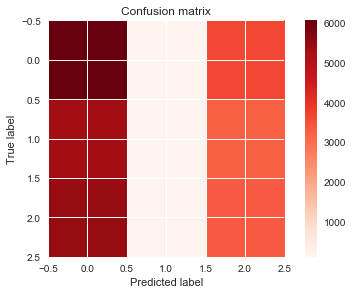

In [95]:
cm=confusion_matrix(y_true, y_pred, labels=None)
    
plt.figure()
plot_confusion_matrix(cm)

In [ ]:
conf = confusion_matrix(y_true, y_pred)
precision = (conf[0, 0] / (conf[0, 0] + conf[1, 0]))
recall = (conf[0, 0] / (conf[0, 0] + conf[0, 1]))
F1 = 2*((precision*recall)/(precision+recall))
            
print(conf)
print ('\n')
print ("Test Data Accuracy:     %0.2f" %(test_acc))

print ("Precision:              %0.2f" %(conf[0, 0] / (conf[0, 0] + conf[1, 0])))
print ("Recall:                 %0.2f"% (conf[0, 0] / (conf[0, 0] + conf[0, 1])))
print ("F1:                     %0.2f" % F1)
cm=confusion_matrix(y_true, y_pred, labels=None)
    
plt.figure()
plot_confusion_matrix(cm)

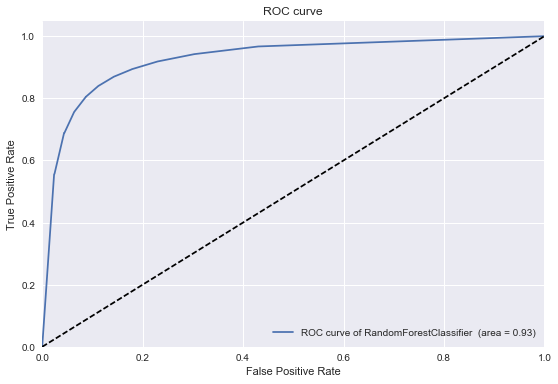

In [139]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import roc_curve, auc
    
y_obs = Y_test

fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(9)
plt.subplot(1,1,1)

for i, alg in enumerate([RandomForestClassifier()]):
    alg.fit(X_train, Y_train)
    y_pred = alg.predict(X_test)

    try:
        y_score = alg.fit(X_train, Y_train).decision_function(X_test)
    except:
        y_score = (alg.fit(X_train, Y_train).predict_proba(X_test))[:,1]

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr[i], tpr[i], _ = roc_curve(y_obs, y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve
    alg_label = str(alg)
    alg_label = alg_label[:alg_label.index('(')]
    plt.plot(fpr[i], tpr[i], label='ROC curve of ' + alg_label+ '  (area = {1:0.2f})'.format(alg_label, roc_auc[i]))


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")

In [140]:
[estimator.tree_.max_depth for estimator in forest.estimators_]

NameError: name 'forest' is not defined

In [608]:
df_Model_1a_HF = df_Model_1a[df_Model_1a.DRG_Definition == '291 - HEART FAILURE & SHOCK W MCC']

In [610]:
X_HF = df_Model_1a_HF.drop(['Provider_ID','Covered_Charges', 'Total_Payments', 'Medicare_Payments','Patient_Payments'],1)

In [615]:
y_HF = df_Model_1a_HF['Covered_Charges']

In [616]:
X_HFcoded = X_HF.apply(preprocessing.LabelEncoder().fit_transform)

In [618]:
from sklearn.preprocessing import label_binarize
y_HFcoded = label_binarize(y_HF,classes=[0, 1, 2])

In [626]:
X_train, X_test, y_train, y_test = train_test_split(X_HFcoded, y_HF, test_size=0.3)

In [625]:
y_HFcoded


array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ..., 
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [627]:
from sklearn.linear_model import LogisticRegressionCV
logregcv = LogisticRegressionCV(Cs=[0.1,1,10,100,1000,10000,100000,200000,300000], cv=10, random_state=1)
logregcv.fit(X_train,y_train)

LogisticRegressionCV(Cs=[0.1, 1, 10, 100, 1000, 10000, 100000, 200000, 300000],
           class_weight=None, cv=10, dual=False, fit_intercept=True,
           intercept_scaling=1.0, max_iter=100, multi_class='ovr',
           n_jobs=1, penalty='l2', random_state=1, refit=True,
           scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [628]:
acc_train_cv = logregcv.score(X_train, y_train)
acc_test_cv = logregcv.score(X_test, y_test)
print("train_score=%.3f\ntest_score =%.3f\n" % (acc_train_cv, acc_test_cv))

train_score=0.555
test_score =0.549



In [629]:
print(logregcv.classes_)
print(logregcv.C_)
print(logregcv.intercept_)
print(logregcv.coef_)
print(logregcv.coefs_paths_)

['0' '1' '2']
[ 0.1  0.1  0.1]
[-0.48565414 -1.49320878 -0.13953182]
[[ 0.          0.02974857 -0.00059755 -0.00116219  0.00522333]
 [ 0.         -0.00258616  0.00025892 -0.01165866 -0.00080647]
 [ 0.         -0.03329227  0.00046828  0.00243223 -0.00568168]]
{'1': array([[[  0.00000000e+00,  -5.00893858e-03,   2.83731718e-04,
          -1.48617054e-02,  -9.30182220e-04,  -1.43390966e+00],
        [  0.00000000e+00,  -5.00893868e-03,   2.83732356e-04,
          -1.48617057e-02,  -9.30182273e-04,  -1.43390966e+00],
        [  0.00000000e+00,  -5.00893924e-03,   2.83731677e-04,
          -1.48617072e-02,  -9.30182797e-04,  -1.43390966e+00],
        [  0.00000000e+00,  -5.00893934e-03,   2.83732410e-04,
          -1.48617075e-02,  -9.30182841e-04,  -1.43390966e+00],
        [  0.00000000e+00,  -5.00893991e-03,   2.83731729e-04,
          -1.48617089e-02,  -9.30183351e-04,  -1.43390966e+00],
        [  0.00000000e+00,  -5.00894000e-03,   2.83732460e-04,
          -1.48617092e-02,  -9.301833

26738.109949856756

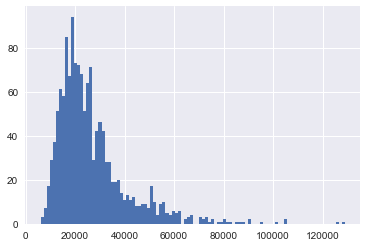

In [123]:
Pulmonary_embolism_df['Average_Covered_Charges'].hist(bins = 100)
Pulmonary_embolism_df['Average_Covered_Charges'].mean()

7279.95497851


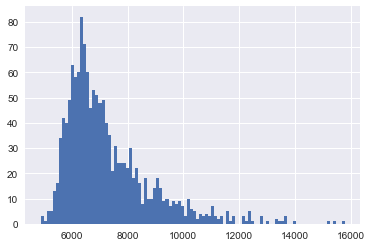

In [121]:
Pulmonary_embolism_df['Average_Total_Payments'].hist(bins = 100)
print(Pulmonary_embolism_df['Average_Total_Payments'].mean())

6077.94866046


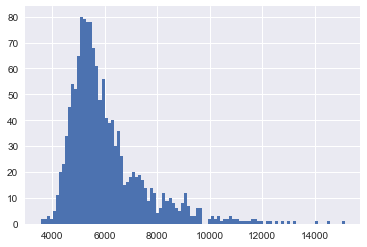

In [122]:
Pulmonary_embolism_df['Average_Medicare_Payments'].hist(bins = 100)
print(Pulmonary_embolism_df['Average_Medicare_Payments'].mean())


In [133]:
Pulmonary_embolism_df['Average_Medicare_Payments'].iloc[0]

5338.0900000000001

In [139]:
n=0
average_comp = []
for entry in Pulmonary_embolism_df['Average_Medicare_Payments']:
    if entry > Pulmonary_embolism_df['Average_Medicare_Payments'].mean():
        #Pulmonary_embolism_df['Medicare_Payments'].iloc[n] == '1'
        average_comp.append('1')
    else:
        #Pulmonary_embolism_df['Medicare_Payments'].iloc[n] == '0'
        average_comp.append('0')
    n=n+1

Pulmonary_embolism_df['Medicare_Payments'] = average_comp

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [140]:
Pulmonary_embolism_df.head()

,DRG_Definition,Provider_Id,Provider_Name,Provider_Street_Address,Provider_City,Provider_State,Provider_Zip_Code,Hospital_Referral_Region_Description,Total_Discharges,Average_Covered_Charges,Average_Total_Payments,Average_Medicare_Payments,Medicare_Payments
13536,176 - PULMONARY EMBOLISM W/O MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,33,23680.30,6020.27,5338.09,0
13537,176 - PULMONARY EMBOLISM W/O MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,14,23228.42,5599.57,4633.85,0
13538,176 - PULMONARY EMBOLISM W/O MCC,10010,MARSHALL MEDICAL CENTER NORTH,8000 ALABAMA HIGHWAY 69,GUNTERSVILLE,AL,35976,AL - Huntsville,12,12814.00,5446.41,4977.41,0
13539,176 - PULMONARY EMBOLISM W/O MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,17,18820.05,6294.29,4565.70,0
13540,176 - PULMONARY EMBOLISM W/O MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,17,31418.05,6328.70,4887.00,0


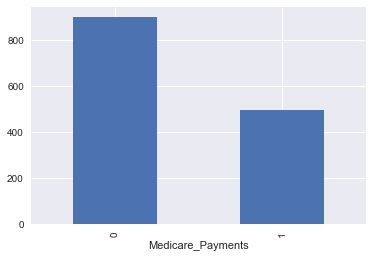

In [141]:
Pulmonary_embolism_df['Medicare_Payments'].groupby([Pulmonary_embolism_df.Medicare_Payments]).count().plot(kind = 'bar')